One of my favorite sites in Berlin is the City Wall. It has a rich history with the modern art gallery that it has been turned into being a photographer's paradise. I took several pictures of a peace dove over a period of 3 hours. This ranged from 16:00 to 19:00, with the sun setting at around 17:45.

On to the fun Machine Learning part.

The first part is importing all the tools I will be using. I have commented in the purposes of each of the imports.

In [1]:
%matplotlib inline 
#To plot within the notebook
from sklearn.decomposition import PCA # Surmoning the Principal Component Gods
import skimage.transform as imtran # The wizard of Image transformation. They do a mean Image resize
import numpy as np # Our package who art in numbers
import matplotlib.pyplot as plt # Let there be plots...
from PIL import Image # This one is a bit boring, Opens images, bla bla bla, the usual.
from mpl_toolkits.mplot3d import Axes3D # 3D projections that are actually better than imax!
import glob #An earth wannabe, 'global environment' package.

I made use of the different colors to represent different images in my plots so the number of images I plot was limited by the number of colors I can include. I have a total of about 40 images, but I worked with 12 here to keep things neat. If you add a new, unique color, another image will be included in the processing.

The first 3 are the outliers. I made the first black, dimgrey and brow for diversity purposes. I'm kidding, It was just easy to tell appart in case some of the points crisscross with the base images of the Berlin Wall.


display_image() is my display tool. It pltos the images in columns of 3 and as many rows as needed.

standard_importer() does the file fetrching from the local directory. You can change this to the path folder name of your choice though I've included my image set for replication purposes.
I converted the images to monochrome hence the 'L' option. I also resize the to 512 by 512 pixels using my image transformer.  The reflect mode so that points outside the boundary/edges, in case there are any, will be filled by a reflection of the image assuming the edge is a 'mirror'.

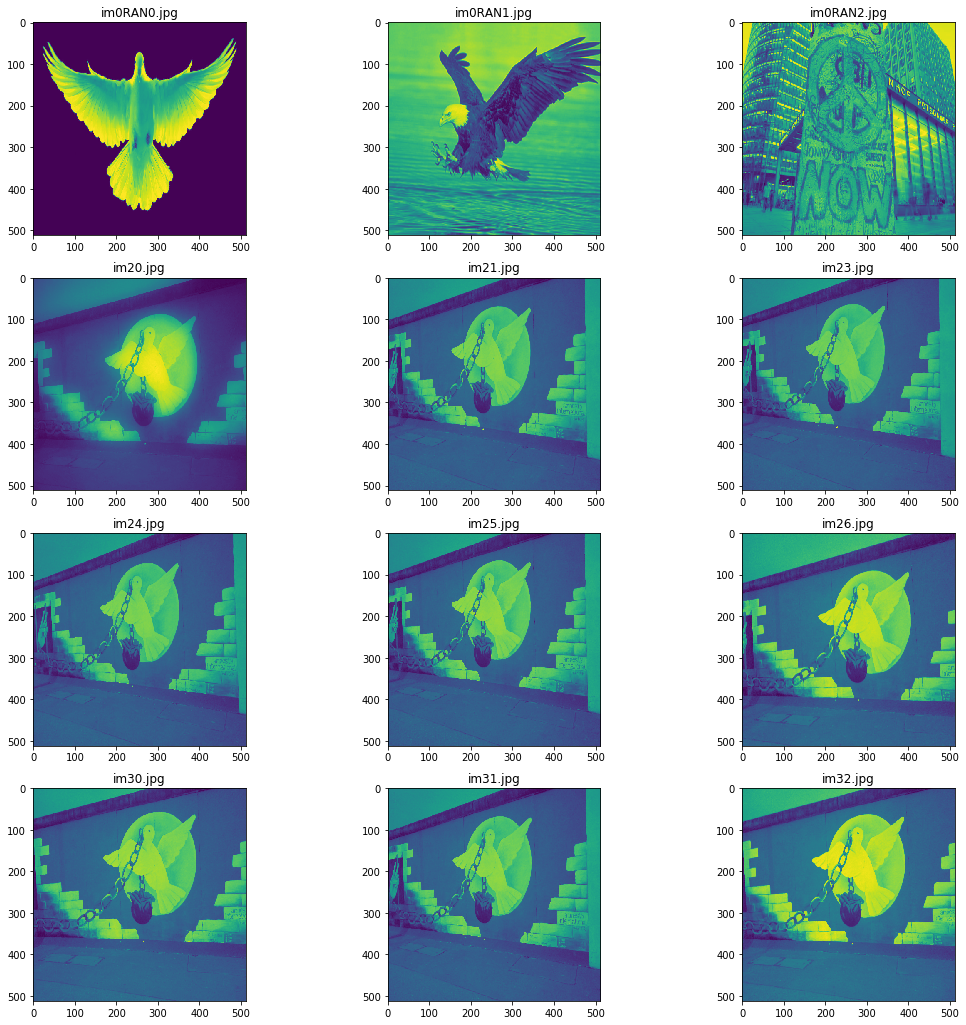

In [2]:
color_set = ['black','dimgrey', 'brown','darkgrey', 'y', 'red', 'blue', 'green','orchid','orange','maroon',
             'khaki', 'peru', 'cyan']
def display_image(images, im_names, rows = 1, columns = 3):
    %matplotlib inline
    fig=plt.figure(figsize=(18, 18))
    count = 0
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images[count])
        plt.title(im_names[count])
        count+=1
    plt.show()
    
def standard_importer(path='./ML-IMGS/PEACE-DOVE'):
    image_list, image_names = [], []
    for file in glob.glob(f'{path}/*.jpg'):
        image_resized = imtran.resize(np.array(Image.open(file).convert('L')), (512,512), mode = "reflect")
        image_list.append(image_resized)
        image_names.append(file.split('\\')[-1])
    return image_list, image_names
peace_doves, dove_names = standard_importer()
display_image(peace_doves, im_names=dove_names, rows=(len(color_set)//3))

This baby here is tiny but does all the work. Sad. 
pca_reduction() takes any image, the number of desired dimensions, by default set to 2 since I had started in 2d but you can change this. It returns a PCA reduced image with the components explaining about 55% of the variance for our base images of the peace dove and for our outliers, it varies a bit more radically than the consistent images. You notice that the peace dove images can have an average of about 55% of the variance explained by the first two components. The first random image was much simpler hence most of Its variance, the 64%, was explained by the first 2 component. One image from late at night was much darker hence the monochrome image was much simple to explain as it generally had a dark shade. Almost 75% of Its variance could be explained by the first two components.  The rest, which were taken in similar light conditions, had about 55% of the variance. Our off site image, the one that was not a bird, was the one least explained byt the first two components. It was fill of random and varying content hence I would expect It to need many more components. Unlike our other images where some large sections were covered with say the sky which is really consistent, this had  a lot of noise. Things were happening everywhere. The extensive variation explains why while the first two components explain a lot, they are not sufficient. We need much more to capture every but of it.
I will include a 'number of components' vs 'variance explained' plot at the bottom.

In [3]:
#These save instances of PCA used for each picture to keep consisten. I will reuse the instances for deconstruction.
#While I technically understand that I can reuse the same 2d and 3d instances, I chose to go by this just for a peace
#of mind. I wanted to keep my instances in check.
image_vars = []
pc_ins2, pc_ins3 = [], []
def pca_reduction(pic, ndim=2):
    #The amount of explained variance is relative to the total amount of explained variance by the components 
    main_fit = PCA().fit(pic)
    pca_reduction.total_components = sum(main_fit.explained_variance_)
    var_exp = [(i/pca_reduction.total_components)*100 for i in sorted(main_fit.explained_variance_, reverse=True)] 
    image_vars.append(var_exp)
    print(f"Total variance captures when decomposing: {pca_reduction.total_components}%")
    pca_reduction.pca = PCA(n_components =ndim)
    if ndim == 2:
        pc_ins2.append(pca_reduction.pca)
    else:
        pc_ins3.append(pca_reduction.pca)
    return pca_reduction.pca.fit_transform(pic)

I separated my 2D and 3D plotters just to keep things need. There are redundancies but it is easier to track them separate.

Our pca_reductor does the dimension reduction and gives us 2 or 3 dimensions depending on our specification which we can plot sensible. There is not much to explain here but at the bottom, I explain what these plots can tell us.

In [4]:
def plot_2d_image(ax,image_2d, col):
    x_list, y_list = [], []
    for point in image_2d:
        x_list.append(point[0])
        y_list.append(point[1])
    ax.scatter(x_list, y_list, marker='1', color=col)
    ax.plot(x_list, y_list, color=col)
    return None

def plot_3d_image(ax, image_3d, col):
    x_list, y_list, z_list = [], [], []
    for point in image_3d:
        x_list.append(point[0])
        y_list.append(point[1])
        z_list.append(point[2])
    ax.scatter(x_list, y_list, z_list,marker="1", color=col)
    ax.plot(x_list, y_list, z_list, color=col)
    return None

def plot_components(image_set, names, dimm=2, color_set=color_set):
    low_dim = []
    if dimm==2:
        fig = plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
        ax = fig.add_subplot(111)
        ax.set_title("2 Dimension Image Plot")
        ax.set_xlabel("1st Principle Component")
        ax.set_ylabel("2nd Principle Component")
        
    if dimm ==3:
        fig = plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title("3 Dimension Image Plot")
        ax.set_xlabel("1st Principle Component")
        ax.set_ylabel("2nd Principle Component")
        ax.set_zlabel("3rd Principle Component")
    for i in range(len(color_set)):
        ld = pca_reduction(image_set[i], ndim = dimm)
        vars_e = [(i/pca_reduction.total_components)*100 for i in sorted(pca_reduction.pca.explained_variance_, reverse =True)]
        totv = sum(vars_e)
        print('-'*100)
        print(f"Component variance explained in order: {vars_e}")
        print(f"{names[i]} Total variance explained by {dimm} components =  {totv}% \n")
        print('-'*100)
        low_dim.append(ld)
        if dimm==2:
            plot_2d_image(ax,ld, col=color_set[i])
        if dimm == 3:
            plot_3d_image(ax,ld, col=color_set[i])
    plt.legend(names)
    return low_dim

Here, we do the reduction and plotting in 2 dimensions. 

You will notice the black plot(im0RAN0) is way higher than the rest of the plots. The grey one(im0RAN1) and brown(im0RAN2) one are a bit mixed in with the rest but their shappes are completely different.

The rest of the points for all images with No RAN in their name are somewhat consistent in shape and span the ame region, somewhere near the mean 0,0. This is the case for both 3D and 2D Plots.

Total variance captures when decomposing: 57.74166664412794%
----------------------------------------------------------------------------------------------------
Component variance explained in order: [43.66800157775984, 23.416869960881847]
im0RAN0.jpg Total variance explained by 2 components =  67.08487153864169% 

----------------------------------------------------------------------------------------------------
Total variance captures when decomposing: 20.54026769421398%
----------------------------------------------------------------------------------------------------
Component variance explained in order: [33.63646936389134, 25.400650796966534]
im0RAN1.jpg Total variance explained by 2 components =  59.03712016085787% 

----------------------------------------------------------------------------------------------------
Total variance captures when decomposing: 16.879921935136817%
----------------------------------------------------------------------------------------------------

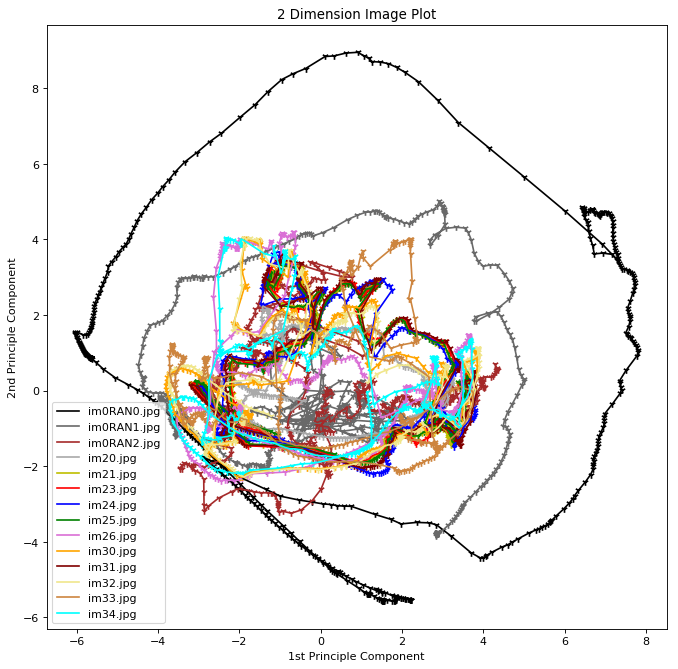

In [5]:
two_dimensional_data = plot_components(peace_doves[0:len(color_set)],dove_names[0:len(color_set)], dimm =2)

With the 3D plot, we make use of 3 Components. These 3 components are the ones that explain the most variance. Of course they will in total explain much more variance of the total captured variance when decomposing. I imagine it would interest you to show how much variance each explains so I have included this too.

Total variance captures when decomposing: 57.74166664412794%
----------------------------------------------------------------------------------------------------
Component variance explained in order: [43.66800157775976, 23.4168699608818, 9.610866258048077]
im0RAN0.jpg Total variance explained by 3 components =  76.69573779668964% 

----------------------------------------------------------------------------------------------------
Total variance captures when decomposing: 20.54026769421398%
----------------------------------------------------------------------------------------------------
Component variance explained in order: [33.63646936389127, 25.400650796966513, 10.895602641904834]
im0RAN1.jpg Total variance explained by 3 components =  69.93272280276261% 

----------------------------------------------------------------------------------------------------
Total variance captures when decomposing: 16.879921935136817%
---------------------------------------------------------------

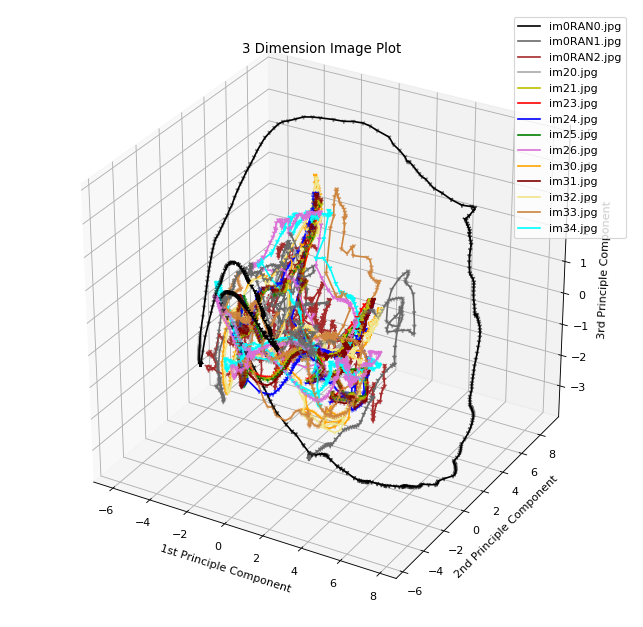

In [6]:
three_dimensional_data = plot_components(peace_doves[0:len(color_set)],dove_names[0:len(color_set)], dimm = 3)

The whole idea is, the numbers we are plotting are weights that tweak the magnitude of effect each component has. It is why for our dove plot, the magnificent flying one, we find it further away from the origin, 0,0. It means it has large weight and in turn the components affect it more hence their ability to explain the variance better. They contribute a lot hence why we see Its plots being way outlying from the rest and being much larger. The third plot, im0RAN0, is the closes to the origin but not at the origin because while the components explain a lot of the variance, it is a mere 40% of the total so they have relatively lower weights compares to the rest. The middle case, out eagle, has slightly more than the rest explained so Its line is a bit close to where most of the images lie, somewhere between our Dove and the rest. Our im0RAN3 is the centermost.


In [7]:
def reconstructor(lower_dimensional_data, dims):
    approximations = [] 
    approx_names = ["app_"+i for i in dove_names]
    count = 0
    for ldi in lower_dimensional_data:
        if dims == 2:
            approximations.append(pc_ins2[count].inverse_transform(ldi))
        else:
            approximations.append(pc_ins3[count].inverse_transform(ldi))
    count+=1
    return display_image(approximations, approx_names, rows=(len(color_set)//3))

Now on to the reconstructions, the same pattern is observed. We should not expect to see the exact image given how drastic the dimensionality reduction has been but it is quite clear what the images are. A clear example is app_im0RAN0, This is our outlier dove. About 64% of the variance on this was captures during decomposition and our reconstruction is quite reflective of the image. We can see some of the colors from the original monochrome and can easily tell the outline of the wings. 

The same can be said about our base images which had a lower total explained variance. You can tell the color scheme but the distortion makes the shape hard to tell. The night image, im20, was fuzzy thus the nitty gritty details that appear in the bright day images were lost. These were not as vital hence why we see more variance being captured. It was a much simpler image to represent since a lot of the edges were shades of black. Similar to our Dove random image. Either way, we can tell it is quite similar to our base images from the site.  These had roughly the same amoung of variance captured and thus, we see much more similarity in the reconstructions. Our Rand2, which was offside, was the one with the most detail. So little of the variance was captured hence why the reconstruction does not give us much information about the original.

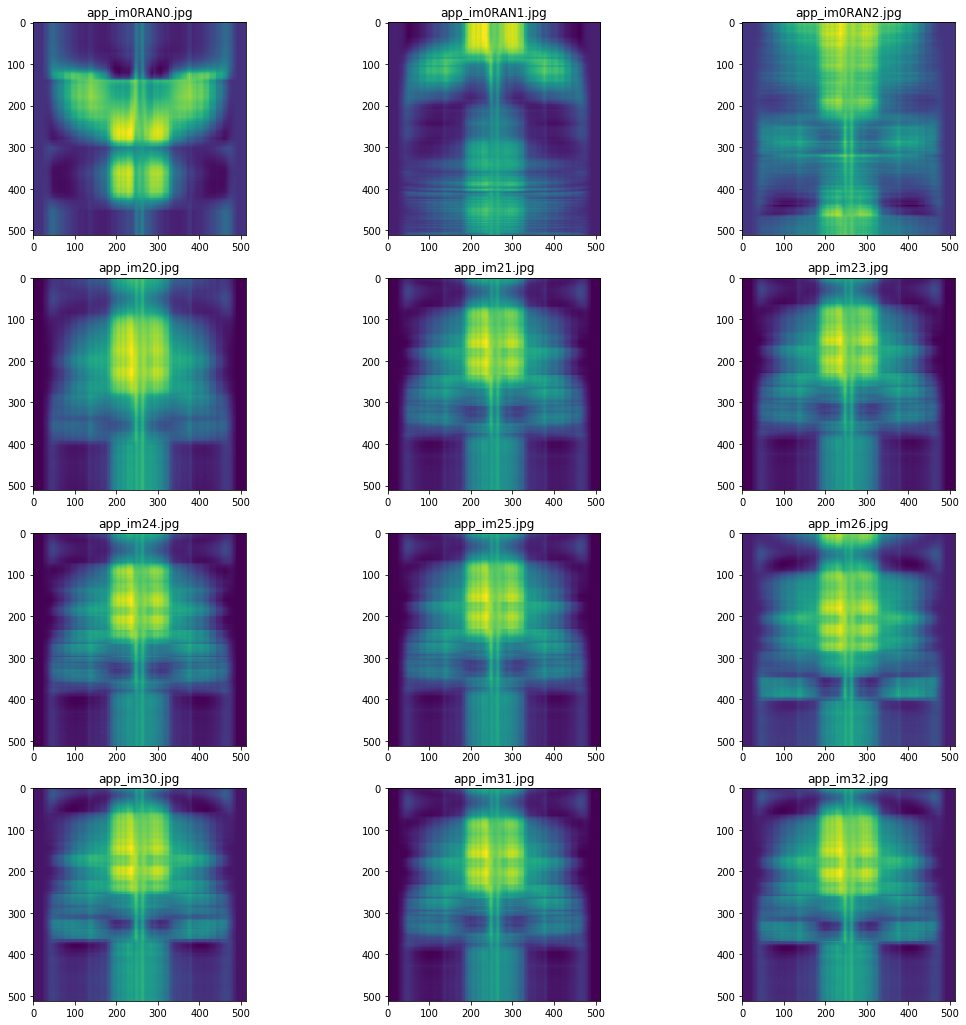

In [8]:
reconstructor(lower_dimensional_data = two_dimensional_data, dims = 2)

The 3 dimension case is similar but with an extra dimension in line to give us more information, the reconstruction are slightly more accurate in reflecting the original features.

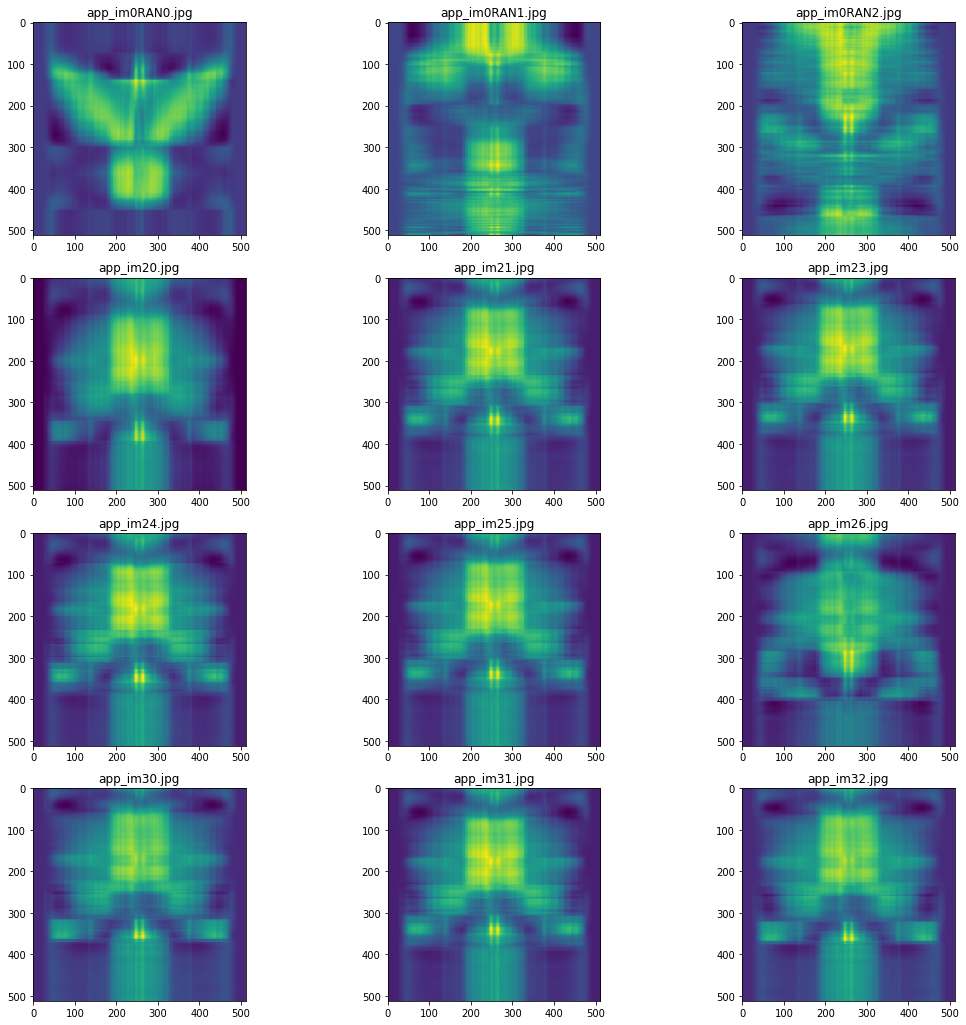

In [9]:
reconstructor(lower_dimensional_data = three_dimensional_data, dims = 3)

This is a plot of the variance explained by the various components. The first components usually capture the most detail, with the relative importance reducing as the component number increases.

I plot for the dove, the eagle, the off site image and one example of the base site images of the wall.

In [10]:
def explained_var(var_exp,imname):
    # PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize=(10, 5))
    plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.title(f'Cumulative Explained Variance as a Function of the Number of Components for {imname}')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
    plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
    plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
    plt.legend(loc='best')
    plt.show()
    return None


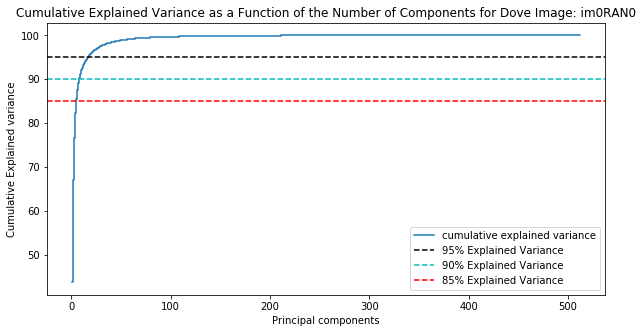

In [11]:
explained_var(image_vars[0], "Dove Image: im0RAN0")

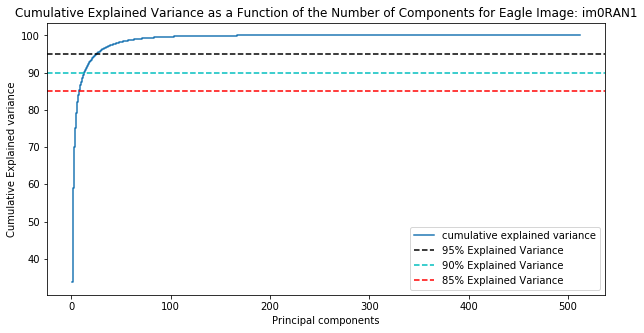

In [13]:
explained_var(image_vars[1], "Eagle Image: im0RAN1")

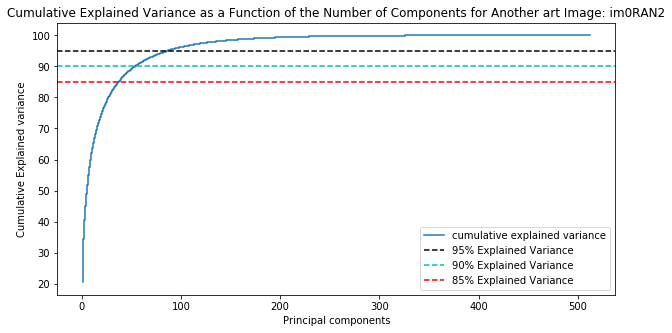

In [14]:
explained_var(image_vars[2], "Another art Image: im0RAN2")

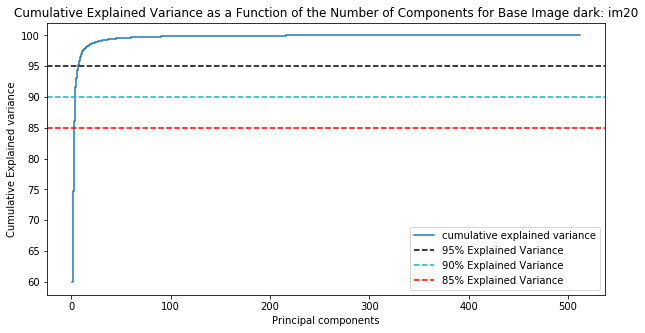

In [15]:
explained_var(image_vars[3], "Base Image dark: im20")

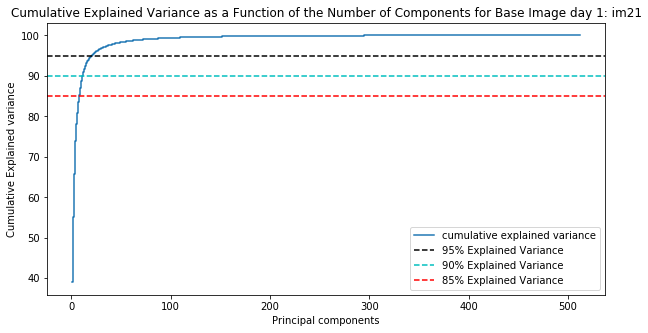

In [16]:
explained_var(image_vars[4], "Base Image day 1: im21")

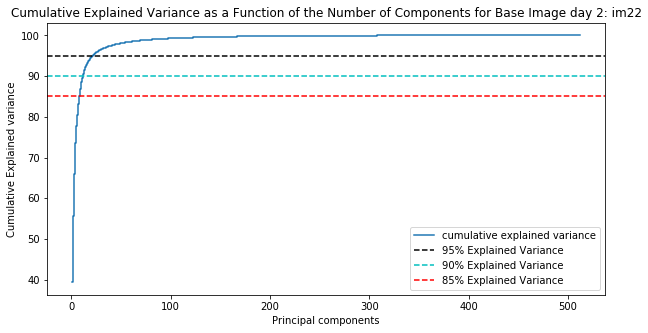

In [17]:
explained_var(image_vars[5], "Base Image day 2: im22")

The general trend is Generally, the fist components explain most of the variance but we have 512 components for each image having flattened them. This explains the sharp rise at the start. The interesting part is how the convergence to 100% happens. This is reflective of the relative importance of the first components. In the off site image, the first components were now quite sufficient. We needed way more components to explain that image hence why the curviness to 100% only happens at around 100 comonents. With the rest of the images, the curviness is relatively fast, a special case is with our dove image which had the fastest relative curviness. Our base images had quite similar curviness thus their graphs are similar.